# Insurance repayment predication


## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy


%matplotlib inline

## Read the data into the notebook

In [2]:
data = pd.read_csv(r'D:\insurance.csv') # importing a file

In [3]:
data.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isnull().sum()  #null value check

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.shape

(1338, 7)

In [6]:
data.describe() # five point summary of the continuous attributes

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


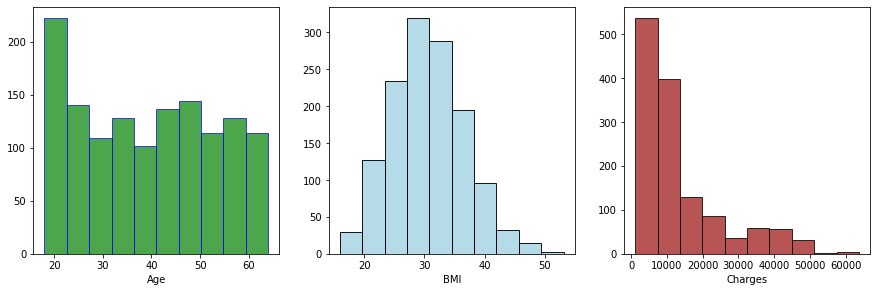

In [7]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize = (15,10))
plt.subplot(231)
plt.hist(data.age,edgecolor = 'blue',color = 'green',alpha=0.7)
plt.xlabel('Age')

plt.subplot(232)
plt.hist(data.bmi,color = 'lightblue',edgecolor = 'black',alpha=0.9)
plt.xlabel('BMI')

plt.subplot(233)
plt.hist(data.charges, color = 'brown',edgecolor = 'black',alpha=0.8)
plt.xlabel('Charges')
plt.show()

In [9]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(data.bmi),stats.skew(data.age),stats.skew(data.charges)]},
                        index=['bmi','age','charges'])
print(Skewness)

         Skewness
bmi      0.283729
age      0.055610
charges  1.514180


## Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

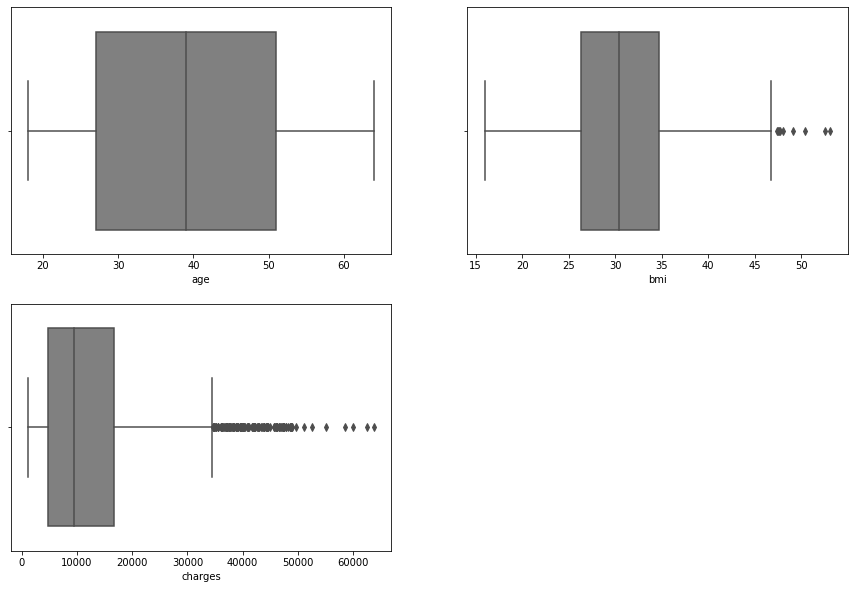

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.boxplot(x = data.age,color='grey')

plt.subplot(222)
sns.boxplot(x = data.bmi,color='grey')

plt.subplot(223)
sns.boxplot(x = data.charges,color='grey')
plt.show()

In [11]:
data.smoker.value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

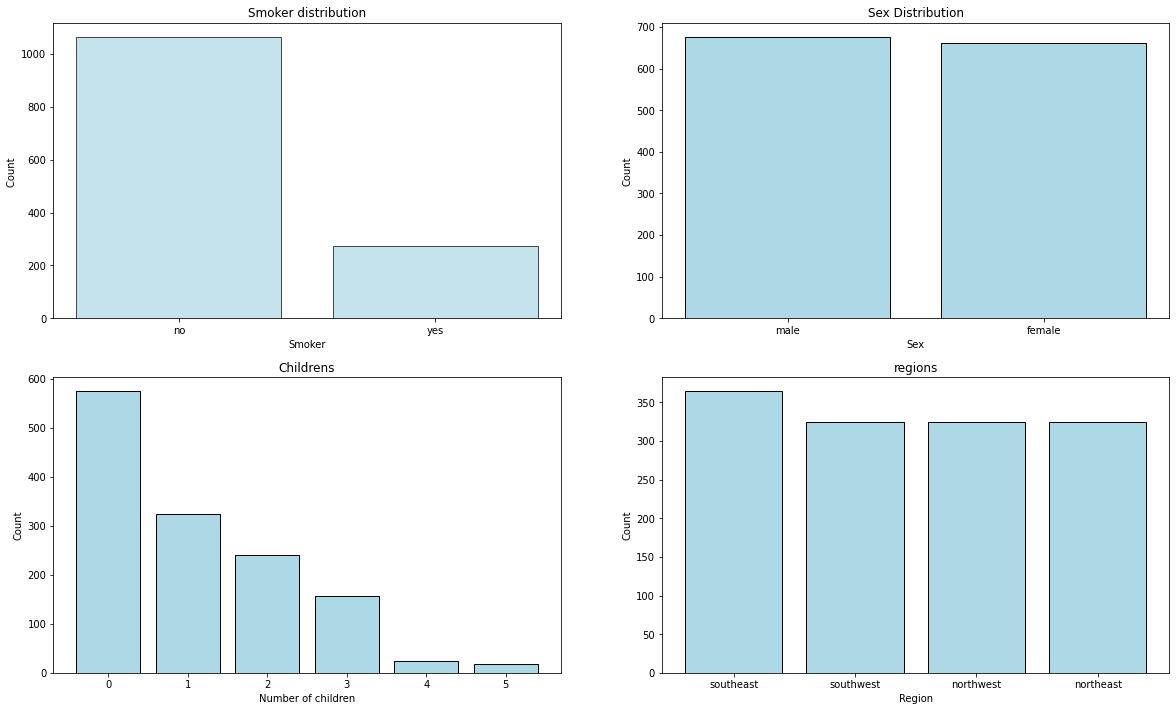

In [12]:
plt.figure(figsize=(20,25))

x = data.smoker.value_counts().index
y = [data['smoker'].value_counts()[i] for i in x]
plt.subplot(421)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)
plt.xlabel('Smoker')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = data.sex.value_counts().index
y1 = [data['sex'].value_counts()[i] for i in x1]
plt.subplot(422)
plt.bar(x1,y1, align='center',color='lightblue',edgecolor='black')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Distribution')

x2 = data.children.value_counts().index
y2 = [data['children'].value_counts()[i] for i in x2]
plt.subplot(423)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Number of children')
plt.ylabel('Count')
plt.title('Childrens')

x3 = data.region.value_counts().index
y3 = [data['region'].value_counts()[i] for i in x3]
plt.subplot(424)
plt.bar(x3,y3, align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('regions')
        
plt.show()

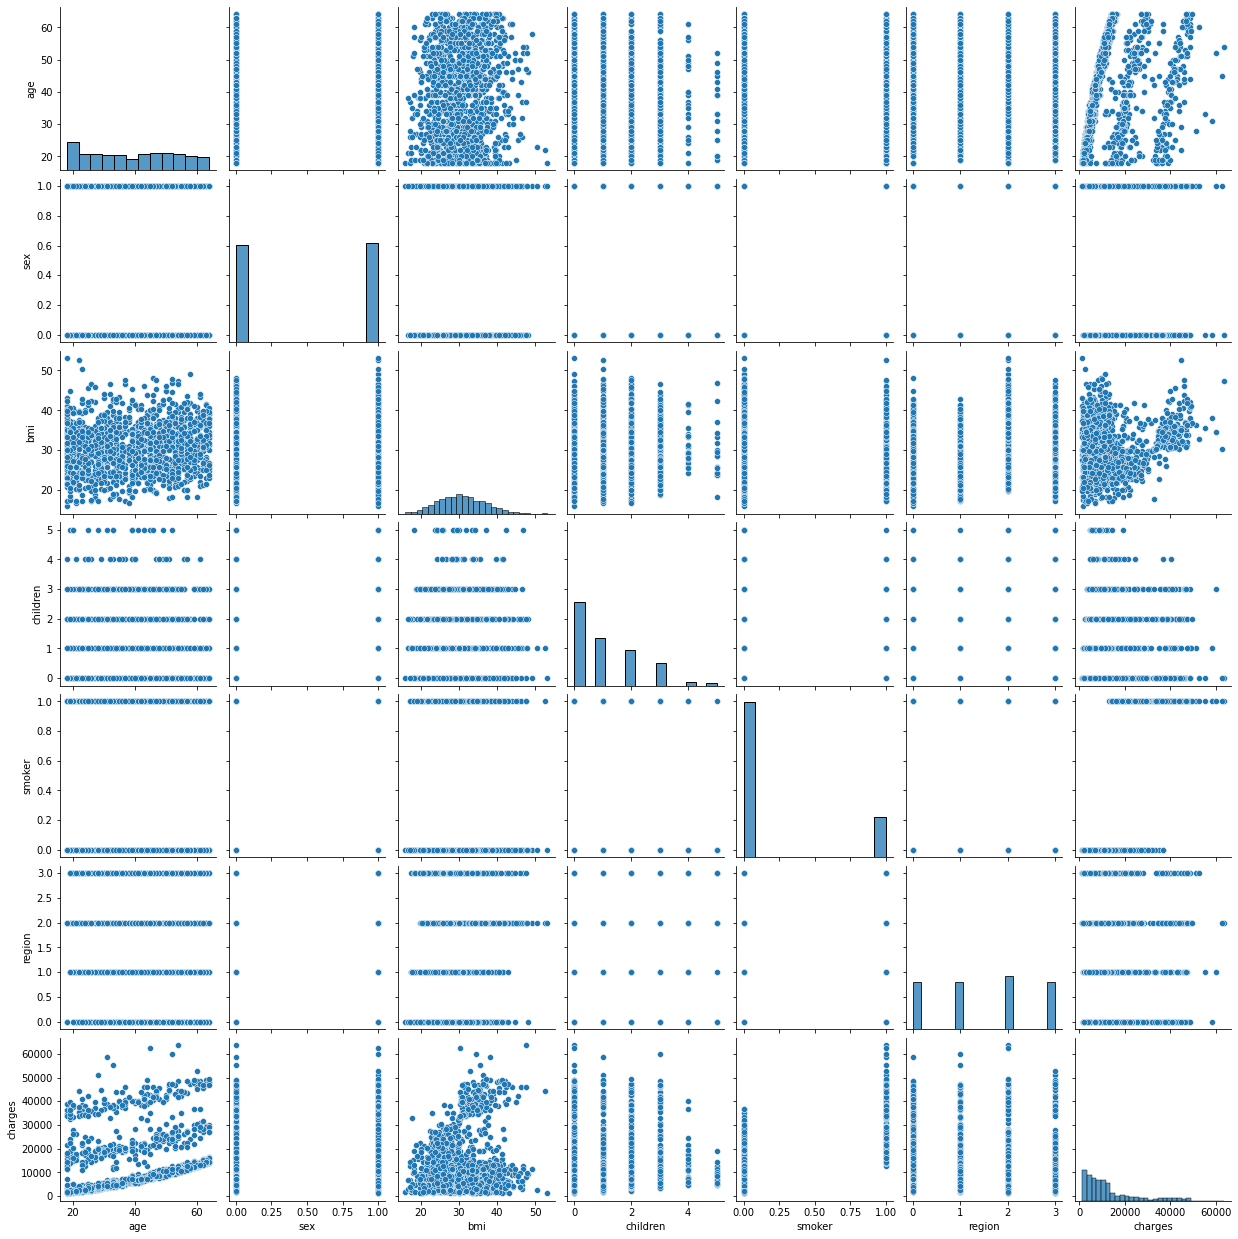

In [18]:
data_encoded = copy.deepcopy(data)
data_encoded.loc[:,['sex', 'smoker','region']] = data_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(data_encoded)  
plt.show()

In [19]:
data_encoded

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


C:\Users\Acer\AppData\Local\Programs\Python\Python39\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


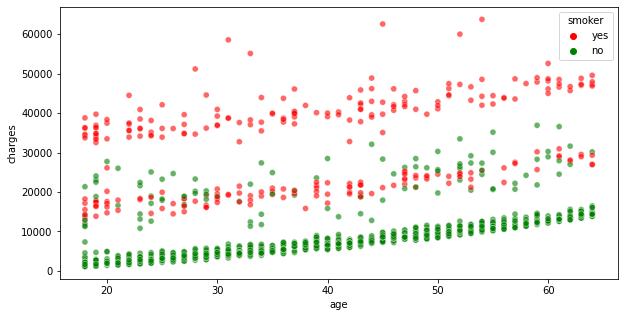

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(data.age,data.charges,hue=data.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

C:\Users\Acer\AppData\Local\Programs\Python\Python39\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


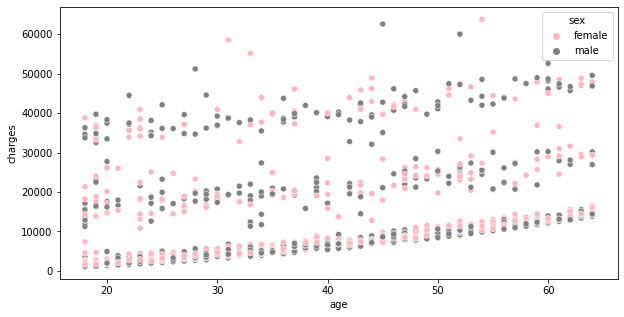

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(data.age,data.charges,hue=data.sex,palette=['lightpink','grey'])
plt.show()